# Funding Data

If you have funding data you would like to contribute, please submit a pull request with a CSV file that includes the following columns:

- `oso_slug`: The OSO project slug.
- `project_name`: The name of the project (according to the funder's data).
- `project_id`: The unique identifier for the project (according to the funder's data).
- `project_url`: The URL of the project's grant application or profile.
- `project_address`: The address the project used to receive the grant.
- `funder_name`: The name of the funding source.
- `funder_round_name`: The name of the funding round or grants program.
- `funder_round_type`: The type of funding this round is (eg, retrospective, builder grant, etc).
- `funder_address`: The address of the funder.
- `funding_amount`: The amount of funding.
- `funding_currency`: The currency of the funding amount.
- `funding_network`: The network the funding was provided on (eg, Mainnet, Optimism, Arbitrum, fiat, etc).
- `funding_date`: The date of the funding event.

In [1]:
import os
import pandas as pd

In [2]:
COLS = [
    "oso_slug",
    "project_name",
    "project_id",
    "project_url",
    "project_address",
    "funder_name",
    "funder_round_name",
    "funder_round_type",
    "funder_address",
    "funding_amount",
    "funding_currency",
    "funding_network",
    "funding_date"
]
dfs = []

In [3]:
os.listdir("uploads/")

['gitcoin_allo+cgrants_all.csv',
 'OctantEpochs1+2Results.csv',
 '2024-02-06_op_tracked_grants.csv',
 'dao_drops_grants.csv']

## Gitcoin

In [4]:
gitcoin = pd.read_csv("uploads/gitcoin_allo+cgrants_all.csv", index_col=0)

gitcoin['quarter'] = pd.PeriodIndex(gitcoin.round_date, freq='Q')
gitcoin['quarter'] = gitcoin['quarter'].apply(str)

def name_round(rid, rname):
    if '0x' in rid:
        return rname
    else:
        return f"GR{rid}"
gitcoin['funder_round_name'] = gitcoin.apply(lambda x: name_round(x['round_id'], x['round_name']), axis=1)

# manual updates to clean a few rounds that are on the edge of a quarter
gitcoin.loc[gitcoin['funder_round_name'] == 'GR2', 'quarter'] = '2019Q2'
gitcoin.loc[gitcoin['funder_round_name'] == 'GR4', 'quarter'] = '2019Q4'

# rename allo gitcoin
gitcoin.loc[gitcoin['quarter'] == '2023Q1', 'funder_round_name'] = 'Alpha'
gitcoin.loc[gitcoin['quarter'] == '2023Q2', 'funder_round_name'] = 'Beta'
gitcoin.loc[gitcoin['quarter'] == '2023Q3', 'funder_round_name'] = 'GG18'
gitcoin.loc[gitcoin['quarter'] == '2023Q4', 'funder_round_name'] = 'GG19'

gitcoin.rename(columns={
    "grant_address": "project_address",
    "program_address": "funder_address",
    "total_usd": "funding_amount",
    "chain_id": "funding_network",
    "round_date": "funding_date"
}, inplace=True)

gitcoin["project_id"] = None
gitcoin["project_url"] = None
gitcoin["funder_name"] = "Gitcoin"
gitcoin["funder_round_type"] = "Quadratic Funding"
gitcoin["funding_currency"] = "DAI"

gitcoin = gitcoin[COLS]
dfs.append(gitcoin)
gitcoin.shape

(18869, 13)

## Octant

In [5]:
octant = pd.read_csv("uploads/OctantEpochs1+2Results.csv")

octant.rename(columns={
    "project name": "project_name",
    "address": "project_address",
    "eth": "funding_amount",
    "start_date": "funding_date",
    "round": "funder_round_name"
}, inplace=True)


octant["project_id"] = octant["project_address"]

octant_url = "https://octant.app/project"
octant["project_url"] = octant.apply(
    lambda x: f"{octant_url}/{x['funder_round_name'].replace('Octant Epoch ','')}/{x['project_address']}"
    , axis=1)

octant["funder_name"] = "Octant"
octant["funder_address"] = "0xc64783f0be60a81a716535287539a694403183ba"
octant["funding_currency"] = "ETH"
octant["funding_network"] = "mainnet"
octant["funder_round_type"] = "Staking Rewards"

octant = octant[COLS]
dfs.append(octant)
octant.shape

(48, 13)

## DAO Drops

In [6]:
dao_drops = pd.read_csv("uploads/dao_drops_grants.csv", index_col=0)

dao_drops.rename(columns={
    "Project": "project_name",
    "To": "project_address",
    "DAI": "funding_amount",
}, inplace=True)

dao_drops["project_id"] = None
dao_drops["project_url"] = "https://daodrops.io/"


dao_drops["funder_name"] = "DAO Drops"
dao_drops["funder_address"] = "0xafe5f7a1d1c173b311047cdc93729013ad03de0c"
dao_drops["funding_currency"] = "DAI"
dao_drops["funding_network"] = "mainnet"
dao_drops["funder_round_type"] = "Retroactive"
dao_drops["funder_round_name"] = "Round 1"
dao_drops["funding_date"] = pd.to_datetime("2023-03-29")

dao_drops = dao_drops[COLS]
dfs.append(dao_drops)
dao_drops.shape

(57, 13)

## Optimism

In [7]:
op = pd.read_csv("uploads/2024-02-06_op_tracked_grants.csv", index_col=0)

op.rename(columns={
    "project": "project_name",
    "amount": "funding_amount",
    "link": "project_url",
    "slug": "oso_slug"
}, inplace=True)

op["funder_name"] = "Optimism Foundation"
op["funding_currency"] = "OP"
op["funding_network"] = "optimism"

# TODO: fix these
op["funder_round_name"] = op["tags"].apply(lambda x: x.split(", ")[0]) # placeholder
op["project_address"] = None # placeholder
op["project_id"] = None # placeholder
op["funder_round_type"] = None # placeholder
op["funding_date"] = None # placeholder
op["funder_address"] = "0x19793c7824be70ec58bb673ca42d2779d12581be" # or 0x2501c477D0A35545a387Aa4A3EEe4292A9a8B3F0

op = op[COLS]
dfs.append(op)
op

oso_slug     project_name project_id  \
0     0x-splits         0xSplits       None   
1     0x-splits           Splits       None   
2        1-inch          Oneinch       None   
3          aave             Aave       None   
4        across  Across Protocol       None   
...         ...              ...        ...   
1073        NaN         web3made       None   
1074        NaN       webOfTrust       None   
1075        NaN  yAcademy/yAudit       None   
1076        NaN       zenbit.eth       None   
1077        NaN    zerokn0wledge       None   

                                            project_url project_address  \
0     https://app.optimism.io/retropgf-discovery/0x9...            None   
1     https://vote.optimism.io/retropgf/3/applicatio...            None   
2     https://gov.optimism.io/t/gf-phase-0-proposal-...            None   
3     https://gov.optimism.io/t/gf-phase-0-proposal-...            None   
4     https://vote.optimism.io/retropgf/3/applicatio...            None   
...                                                 ...             ...   
1073  https://vote.optimism.io/retropgf/3/applicatio...            None   
1074  https://vote.optimism.io/retropgf/3/applicatio...            None   
1075  https://vote.optimism.io/retropgf/3/applicatio...            None   
1076  https://vote.optimism.io/retropgf/3/applicatio...            None   
1077  https://vote.optimism.io/retropgf/3/applicatio...            None   

              funder_name funder_round_name funder_round_type  \
0     Optimism Foundation         RetroPGF2              None   
1     Optimism Foundation         RetroPGF3              None   
2     Optimism Foundation   Grants Season 1              None   
3     Optimism Foundation   Grants Season 1              None   
4     Optimism Foundation         RetroPGF3              None   
...                   ...               ...               ...   
1073  Optimism Foundation         RetroPGF3              None   
1074  Optimism Foundation         RetroPGF3              None   
1075  Optimism Foundation         RetroPGF3              None   
1076  Optimism Foundation         RetroPGF3              None   
1077  Optimism Foundation         RetroPGF3              None   

                                  funder_address  funding_amount  \
0     0x19793c7824be70ec58bb673ca42d2779d12581be        52154.00   
1     0x19793c7824be70ec58bb673ca42d2779d12581be        92167.83   
2     0x19793c7824be70ec58bb673ca42d2779d12581be       300000.00   
3     0x19793c7824be70ec58bb673ca42d2779d12581be       300000.00   
4     0x19793c7824be70ec58bb673ca42d2779d12581be        38223.26   
...                                          ...             ...   
1073  0x19793c7824be70ec58bb673ca42d2779d12581be         4968.96   
1074  0x19793c7824be70ec58bb673ca42d2779d12581be        19875.86   
1075  0x19793c7824be70ec58bb673ca42d2779d12581be            0.00   
1076  0x19793c7824be70ec58bb673ca42d2779d12581be            0.00   
1077  0x19793c7824be70ec58bb673ca42d2779d12581be        11580.67   

     funding_currency funding_network funding_date  
0                  OP        optimism         None  
1                  OP        optimism         None  
2                  OP        optimism         None  
3                  OP        optimism         None  
4                  OP        optimism         None  
...               ...             ...          ...  
1073               OP        optimism         None  
1074               OP        optimism         None  
1075               OP        optimism         None  
1076               OP        optimism         None  
1077               OP        optimism         None  

[1078 rows x 13 columns]

# Merge and dump

In [8]:
df = pd.concat(dfs,axis=0, ignore_index=True)
df.to_csv("funding_data.csv")

# Dataviz

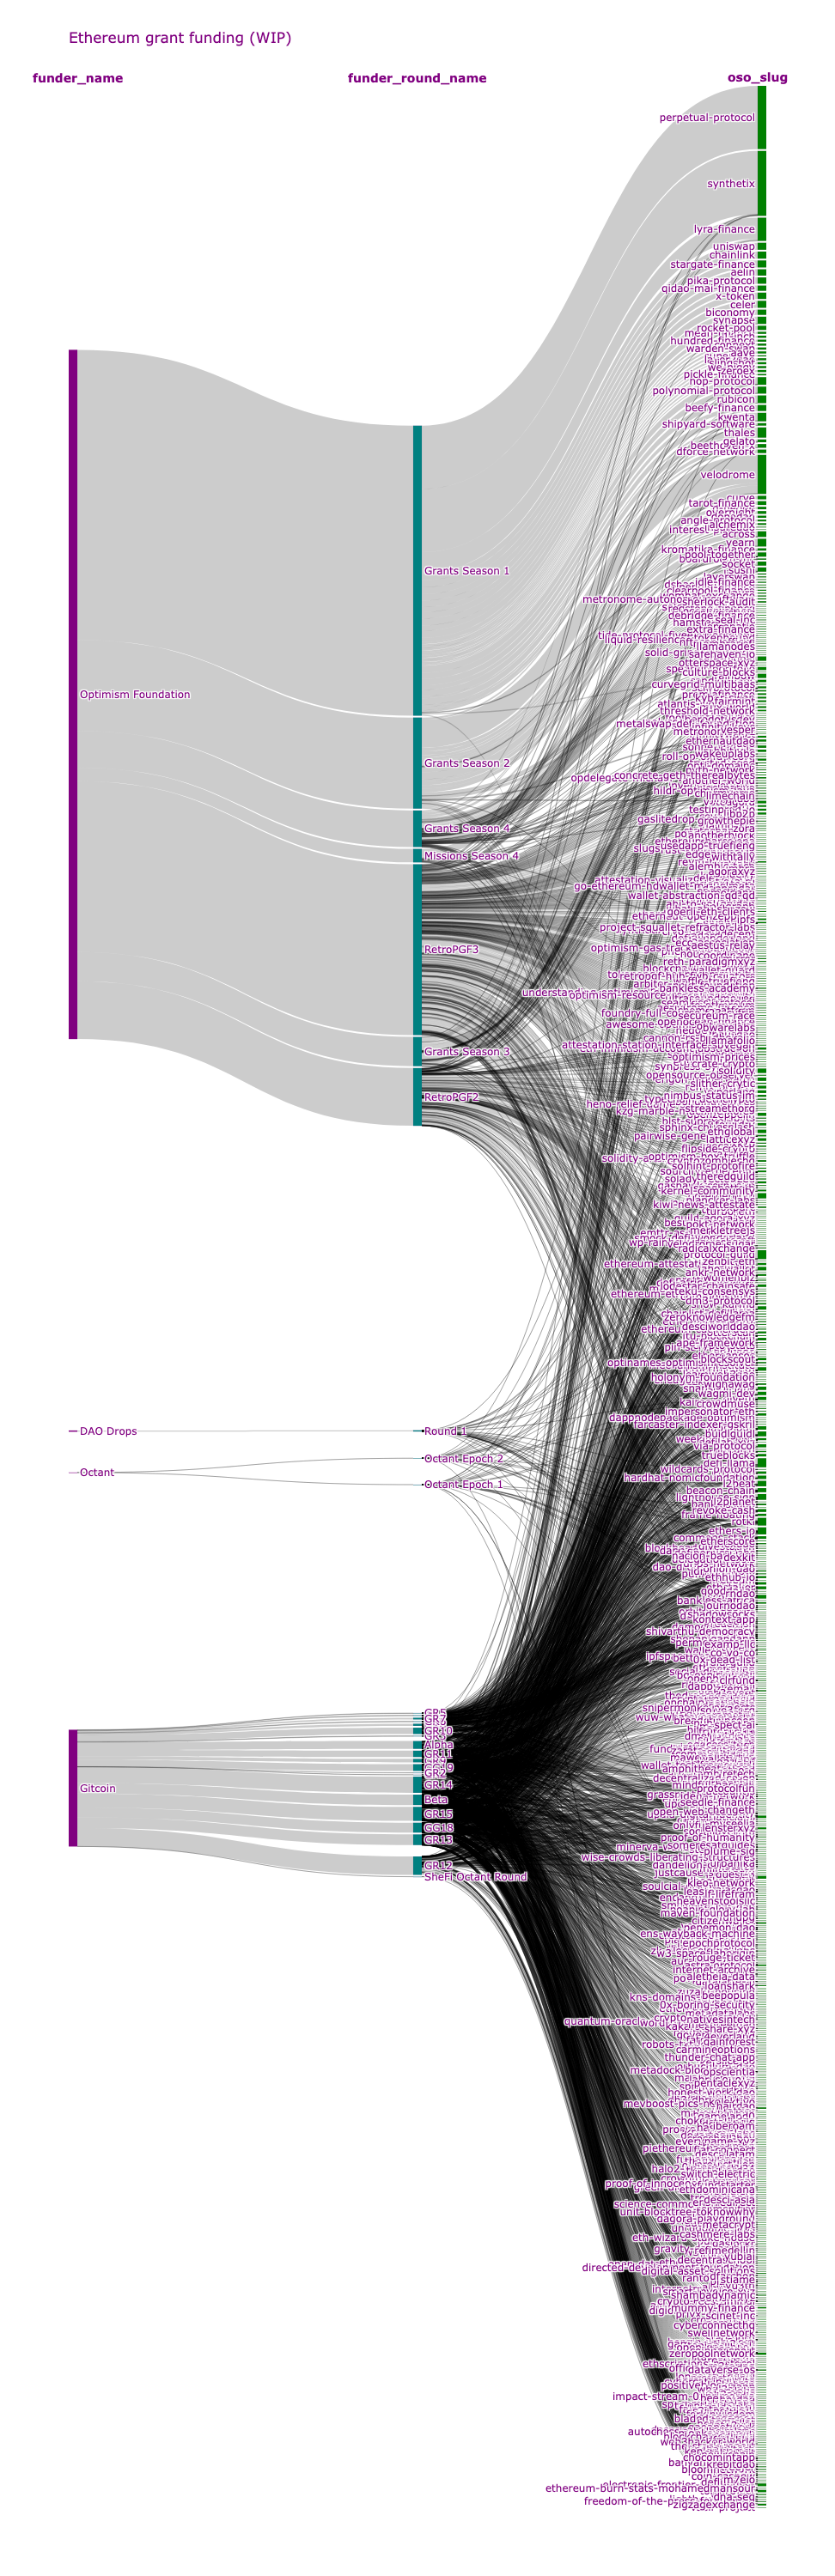

In [9]:
import os
import sys
import plotly.graph_objects as go

sys.path.append(os.path.abspath("../../../visualizations/"))
from sankey import make_sankey_graph

In [10]:
dff = df[(df['oso_slug'].isna()==False) & (df['oso_slug'].str.contains(',') == False)]

In [11]:
fig = make_sankey_graph(
    dff,
    cat_cols=['funder_name', 'funder_round_name', 'oso_slug'],
    value_col='funding_amount',
    title='Ethereum grant funding (WIP)',
    height=2000,
    main_color='purple',
    med_color='teal',
    light_color='green'
)
go.Figure(fig)